In [1]:
# Подключенине библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import re
from custom_modules import data_processing as dp
import custom_modules.PipeData as pidf

from matplotlib import ticker
from IPython.display import display
from tensorflow import keras

In [2]:
def draw_map(data_map, label):
    with plt.style.context('dark_background'):
            fig, ax = plt.subplots()
        
            fig.set_figwidth(18)
            fig.set_figheight(8)
            fig.patch.set_alpha(0.0)
        
            ax.invert_yaxis()
            ax.xaxis.tick_top()
            ax.xaxis.set_label_position('top')
            ax.set_title(label, fontsize=25)
            ax.set_xlabel('Номер датчика', fontsize=20)
            ax.set_ylabel('Номер измерения', fontsize=20)
            ax.tick_params(axis='both', labelsize = 20)

            map = ax.pcolormesh(data_map)
            cbar = fig.colorbar(map)
            cbar.ax.tick_params(labelsize=20)

            ax.xaxis.set_major_locator(ticker.MultipleLocator(60))
    
    plt.show()

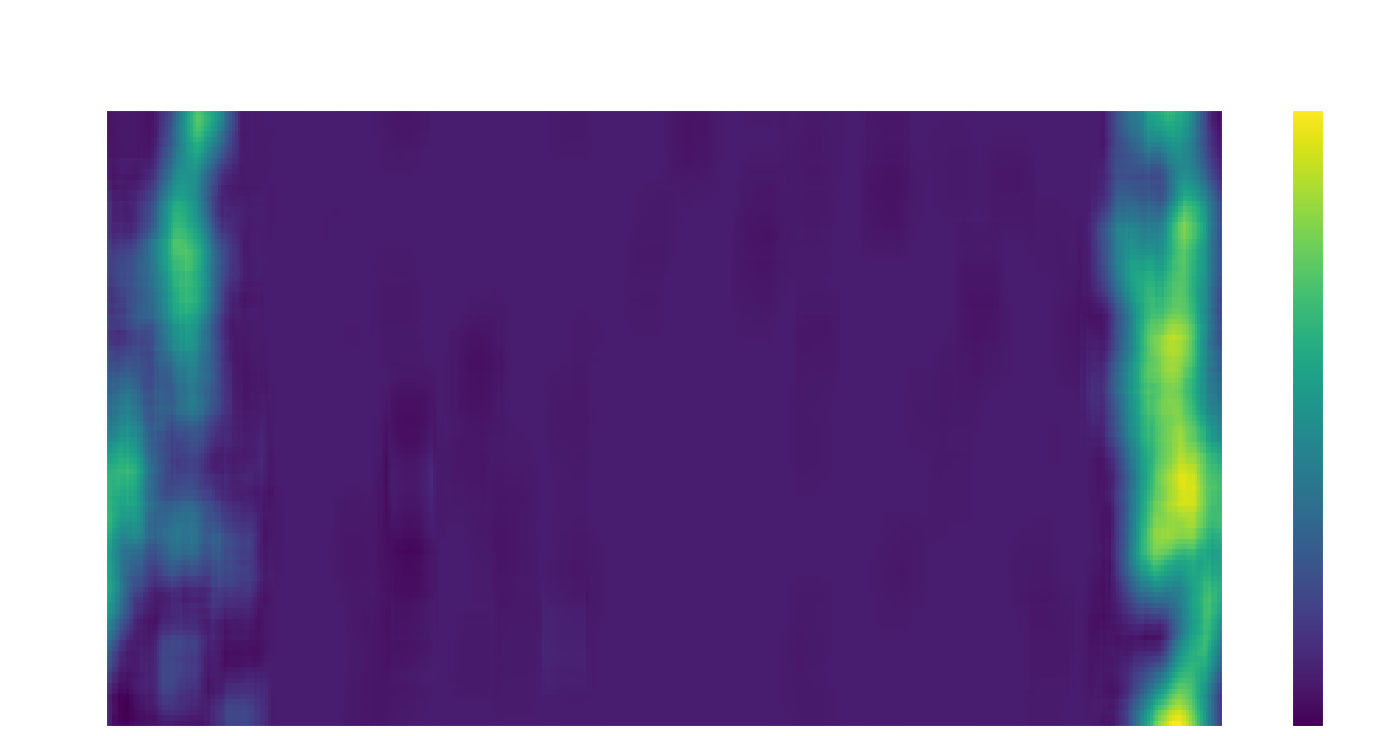

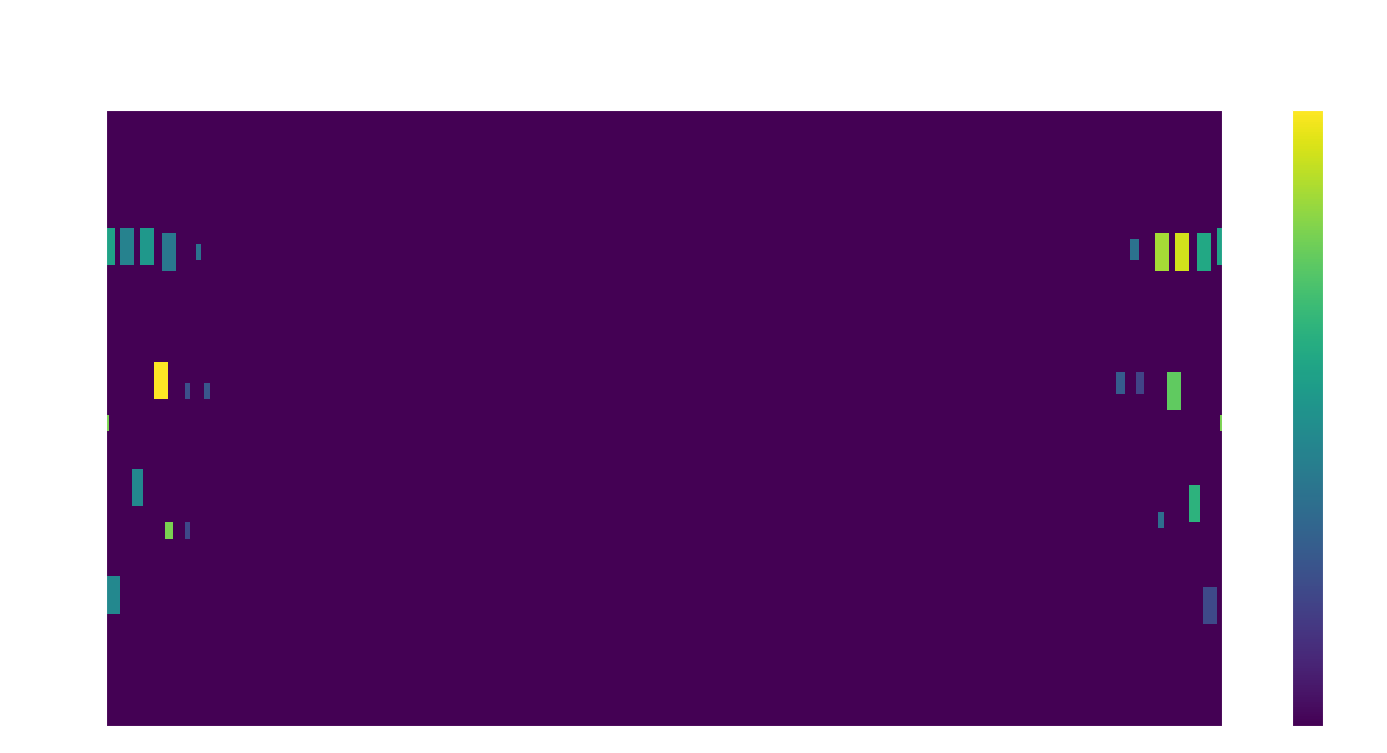

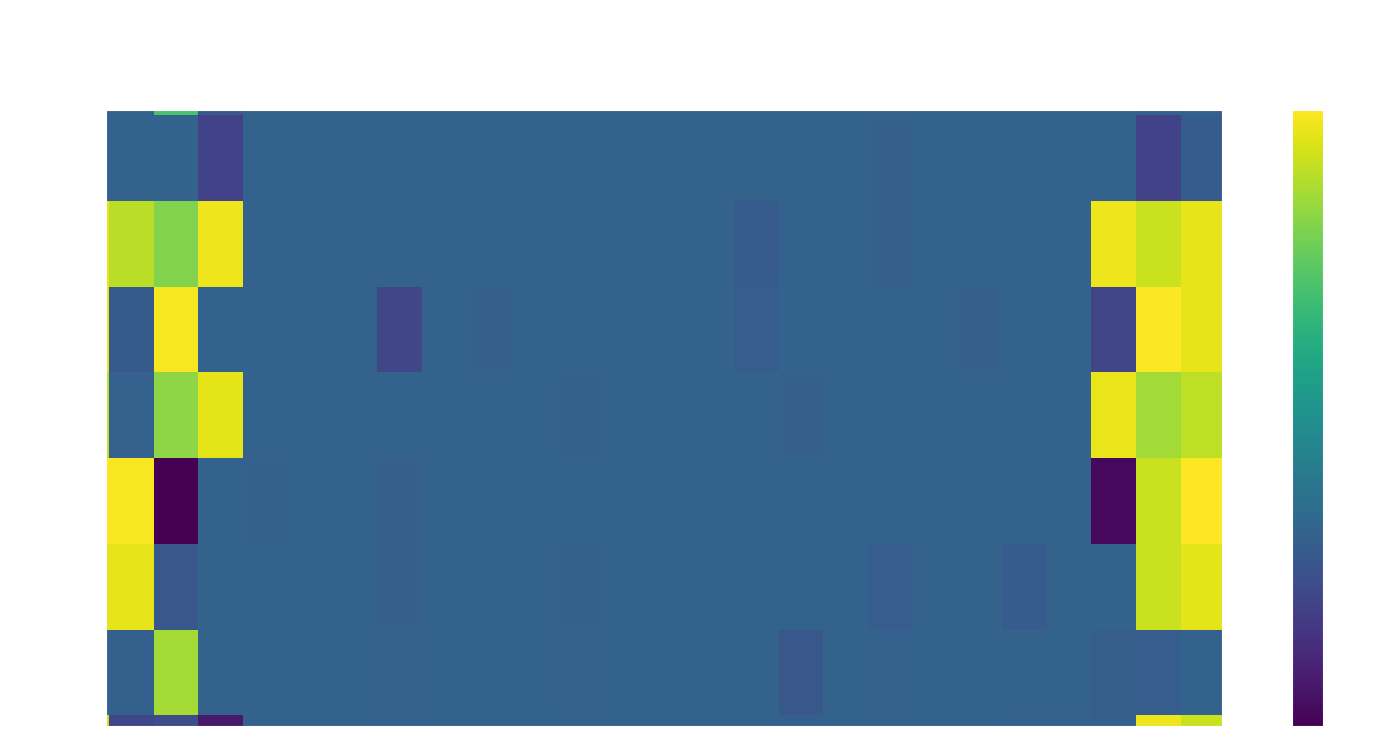

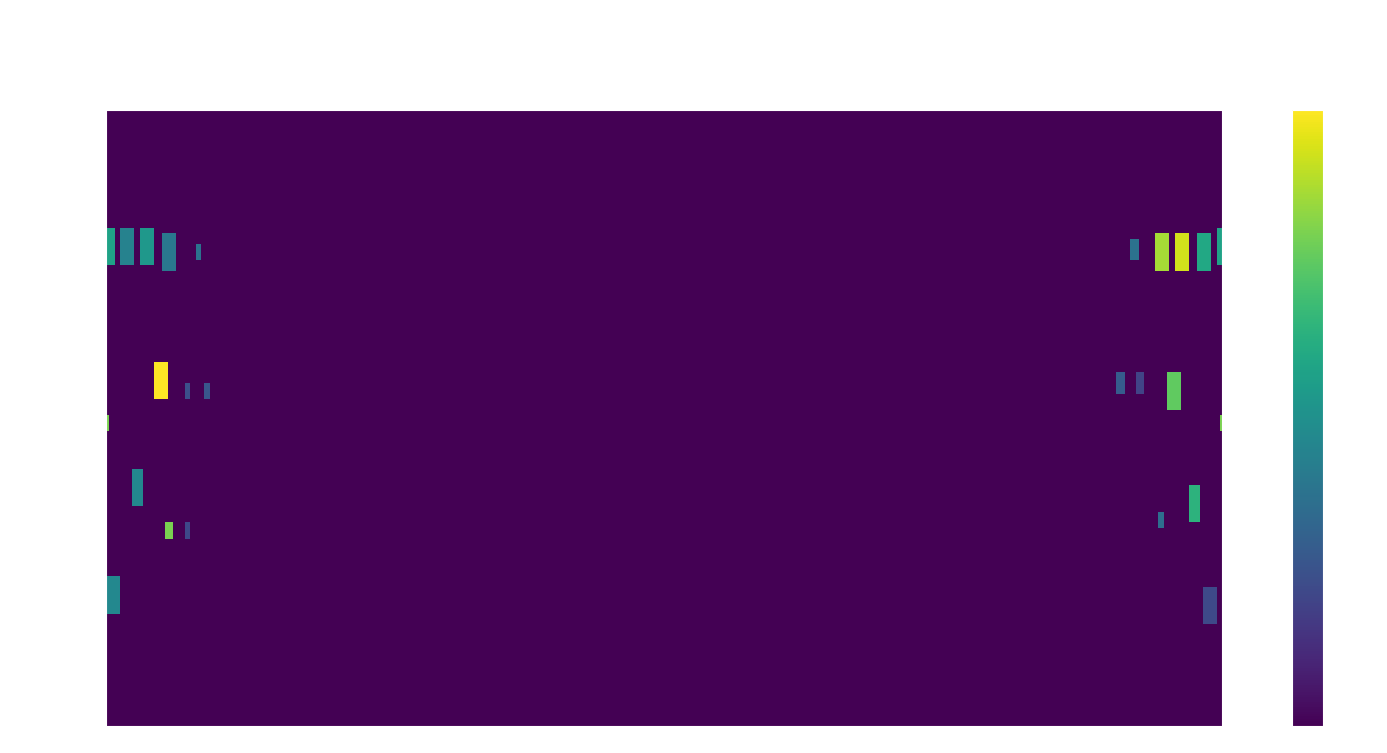

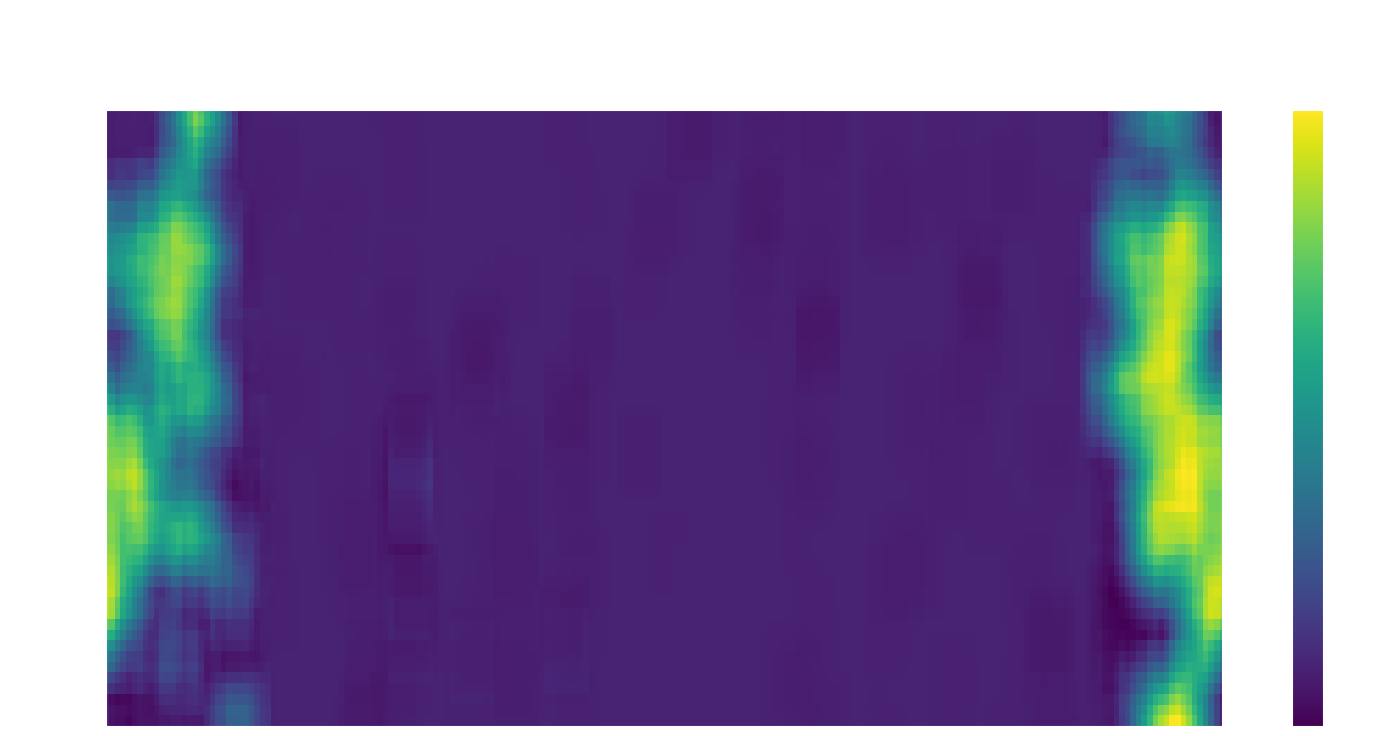

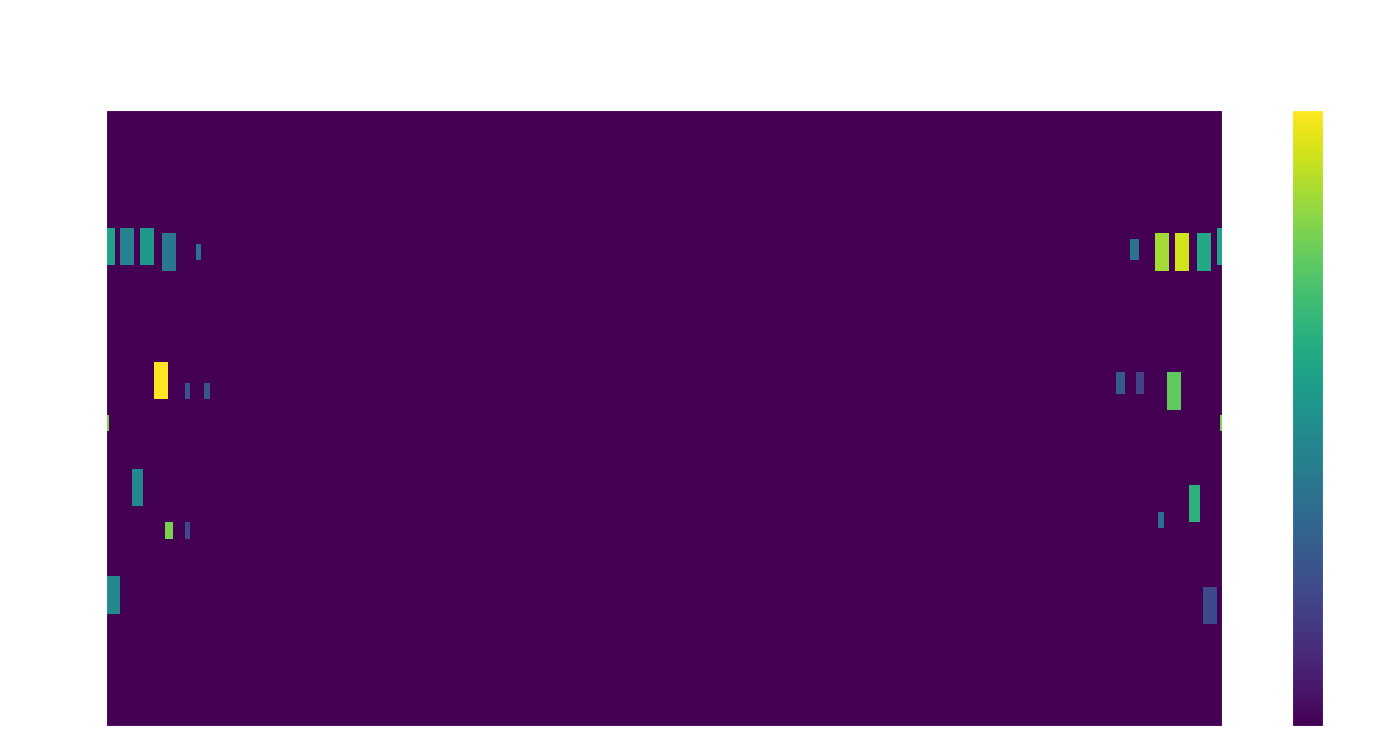

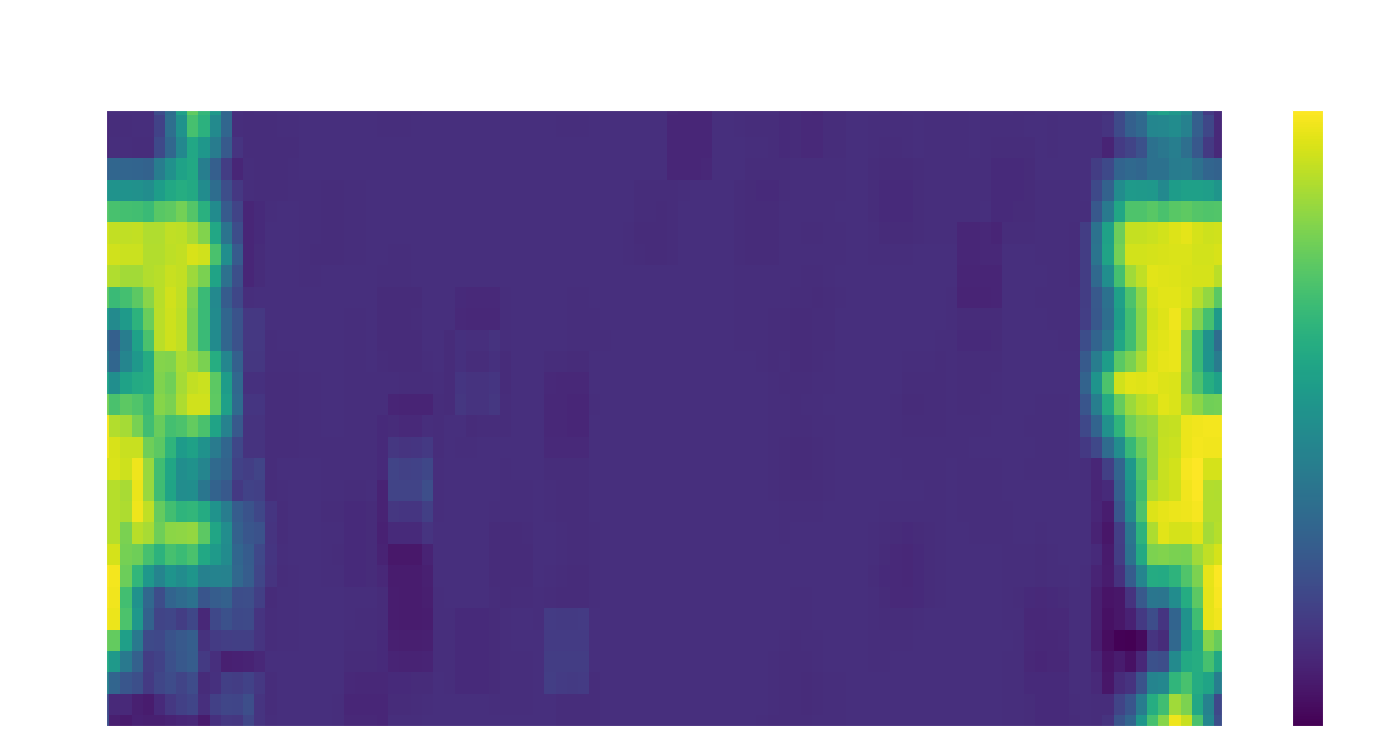

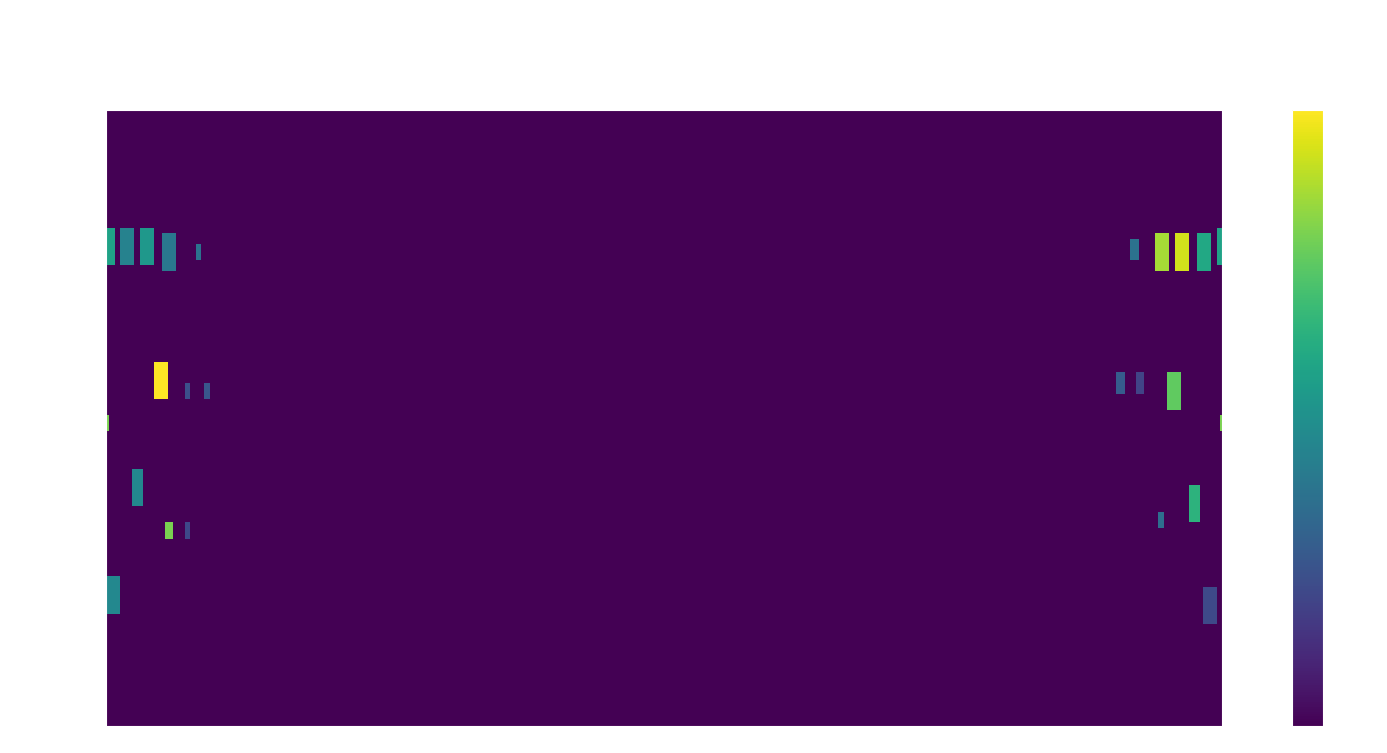

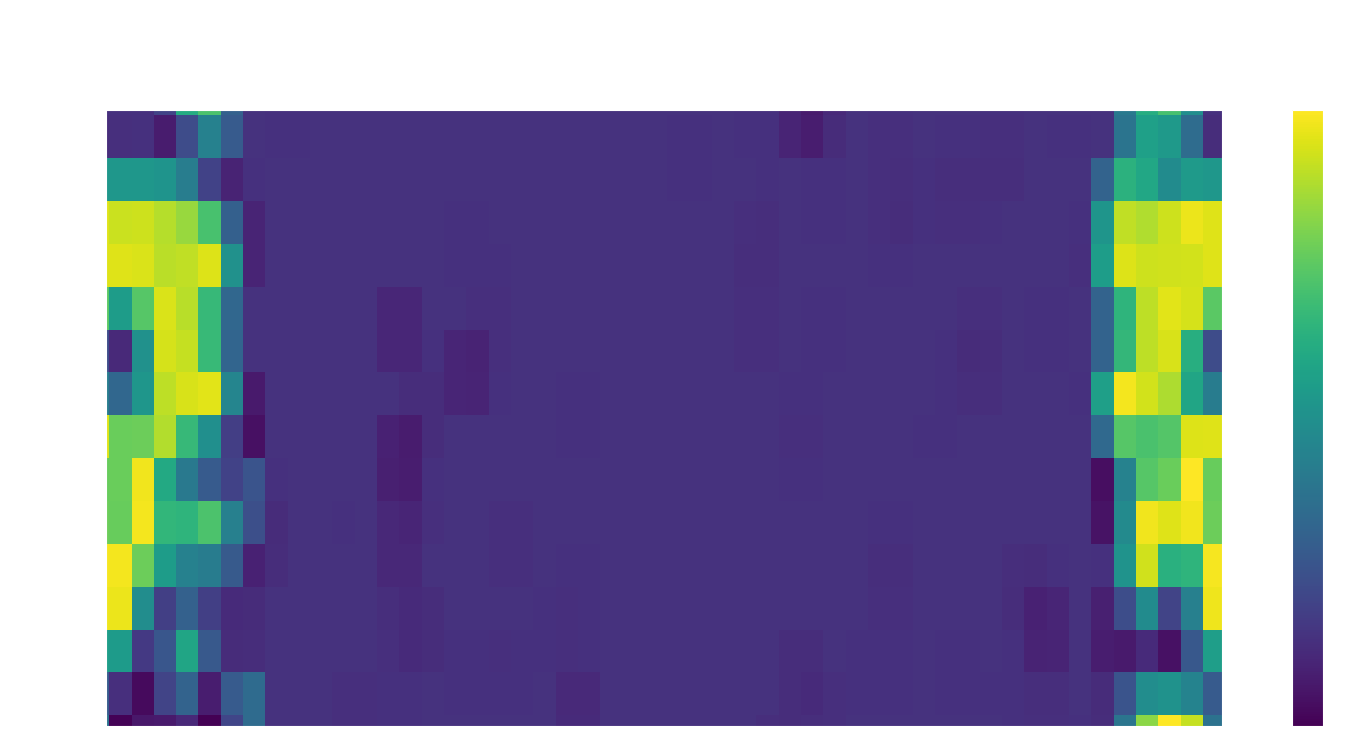

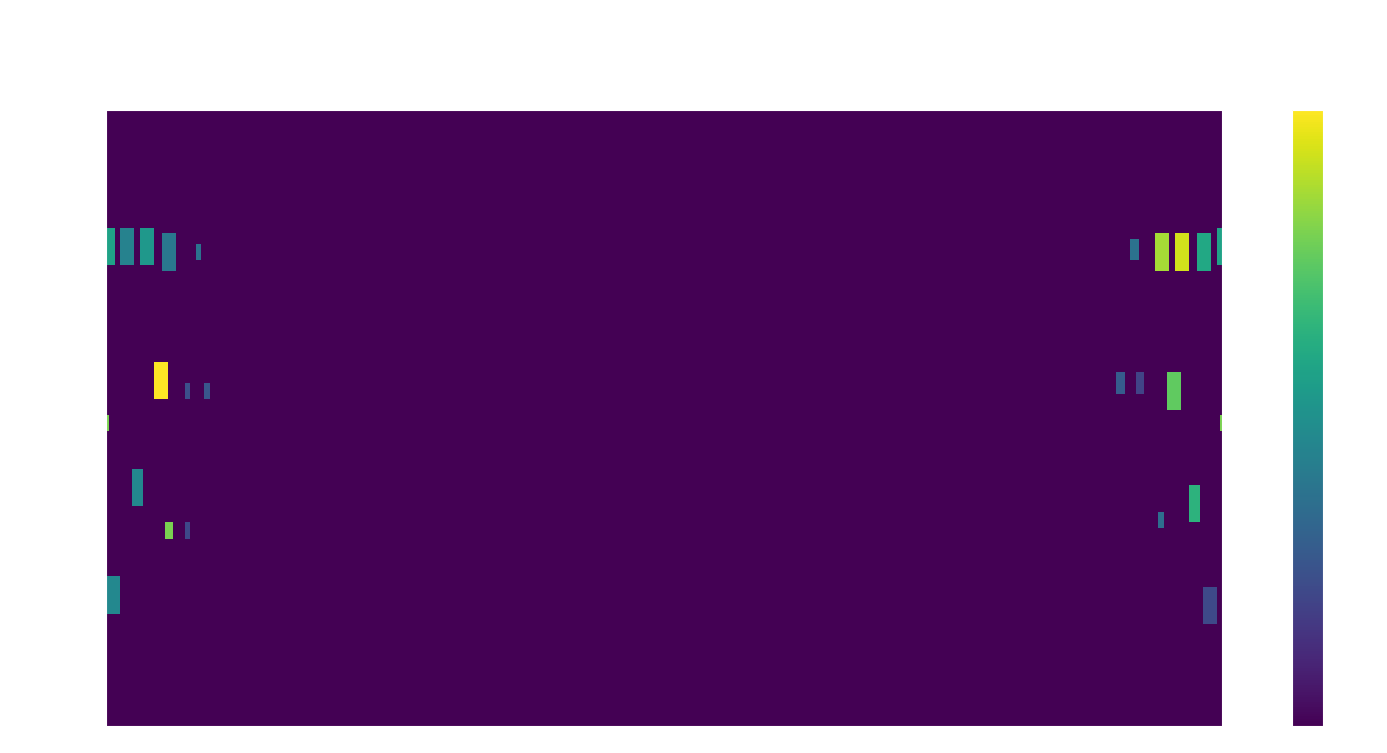

In [3]:
RUN = 1
MODEL_ID = '03'
PATH = f'data/Drawing data/Run{RUN}'

regex = F'(model_id={MODEL_ID}).*'

for name in os.listdir(PATH):
    res = re.match(regex, name)
    if not res is None: 
        or_res_df = pd.read_excel(PATH+'/'+res[0], sheet_name='orig_res', index_col=0, dtype=np.float64)
        or_ref_df = pd.read_excel(PATH+'/'+res[0], sheet_name='orig_reference', index_col=0, dtype=np.float64)
        draw_map(or_res_df,f'PREDICTION RUN{RUN}' + res[0])
        draw_map(or_ref_df,f'REFERENCE RUN{RUN}' + res[0])